In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# 1. Analyse the data using the visualizations

In [6]:
df=pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [22]:
# Check dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


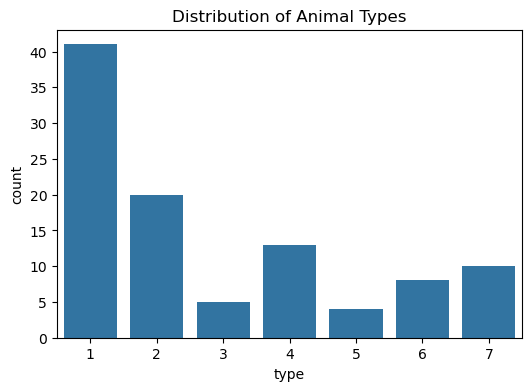

In [20]:
# Check for class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type')
plt.title("Distribution of Animal Types")
plt.show()

In [28]:
df1=df.drop('animal name', axis=1)
df1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


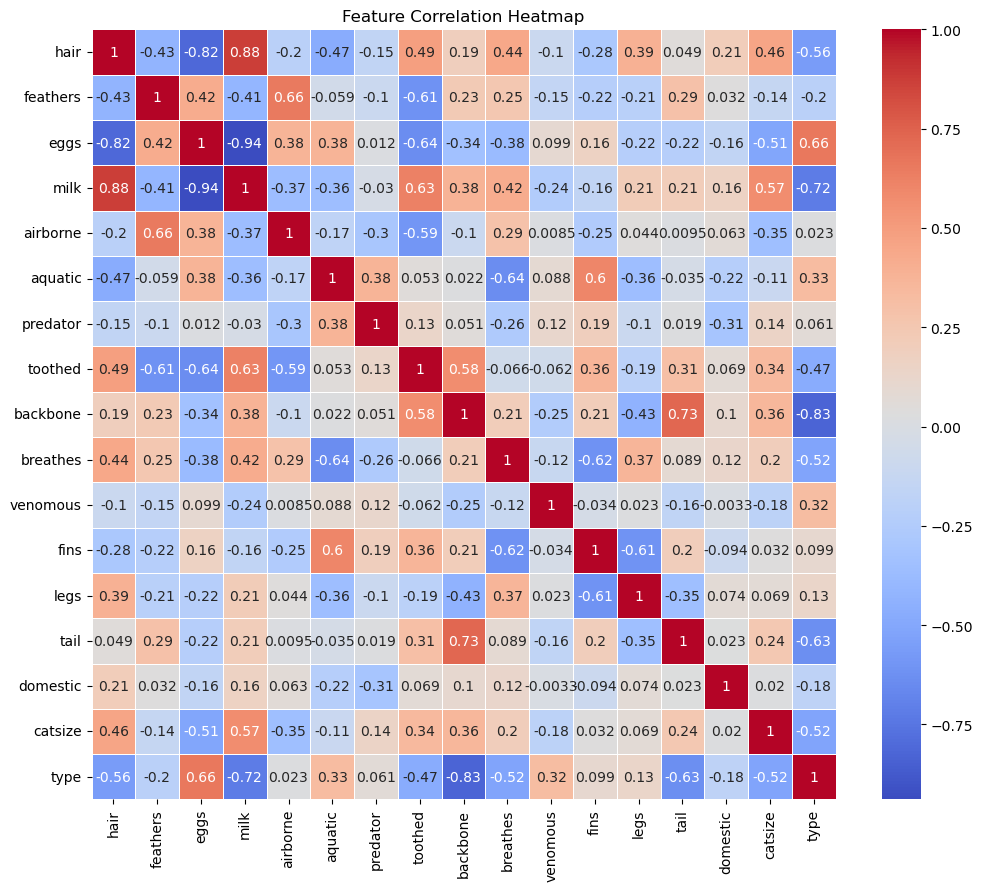

In [30]:
# Correlation heatmap (to check how features relate to each other)
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# 2: Preprocess the data

In [37]:
# Check for missing values
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


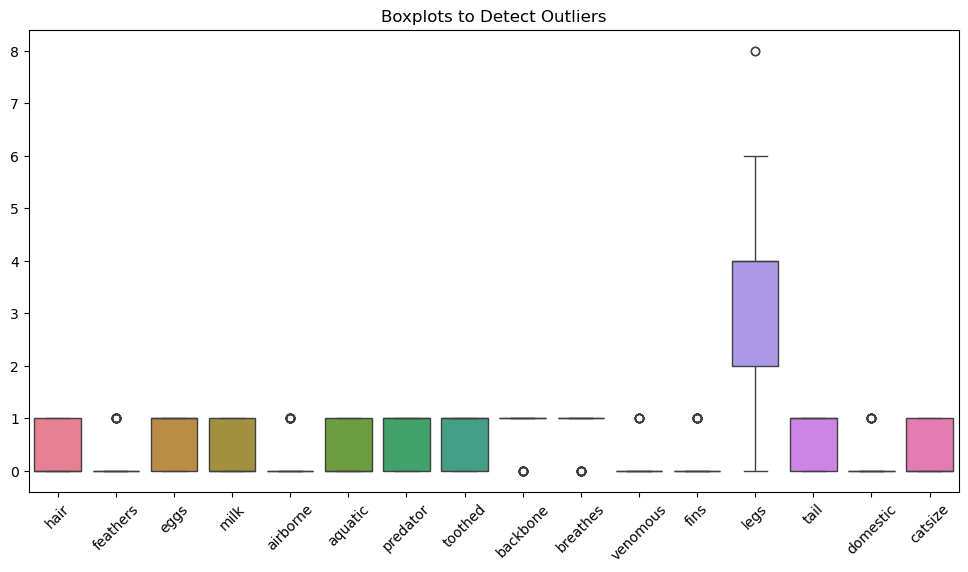

In [41]:
# Outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('type', axis=1))
plt.title("Boxplots to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

# 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [66]:
# Separate features and target
x = df1.drop(columns=['type']) #Features
y = df1['type'] #Target

In [68]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [70]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [72]:
# Confirm split sizes
print(f"Training set size: {x_train.shape[0]}")
print(f"Testing set size: {x_test.shape[0]}")

Training set size: 80
Testing set size: 21


# 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [130]:
# Initialize KNN classifier (default K=5)
k=5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [132]:
# Train the model
knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [134]:
# Predict on test set
y_pred = knn.predict(x_test)
y_pred

array([5, 2, 4, 2, 1, 1, 4, 6, 1, 4, 7, 1, 1, 7, 1, 2, 4, 6, 1, 1, 2],
      dtype=int64)

# 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [137]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21

Accuracy Score: 0.9523809523809523


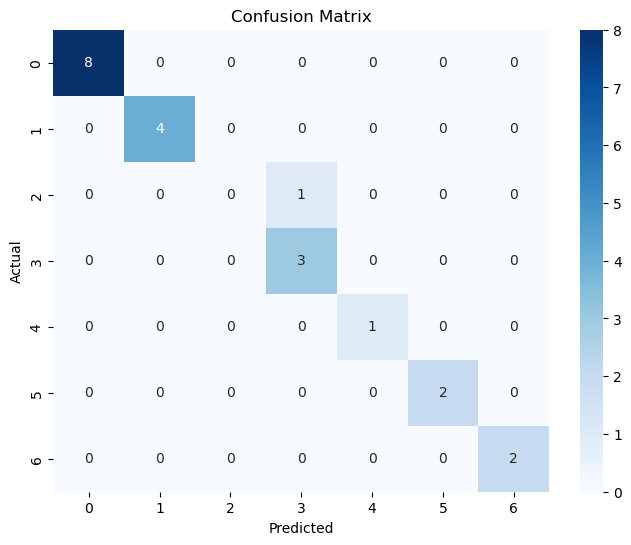

In [139]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7. Visualize the decision boundaries of the classifier.

In [142]:
pca = PCA(n_components=2)
pca

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [144]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
print('x_train_pca \n',x_train_pca,'\n')
print('x_test_pca \n',x_test_pca)

x_train_pca 
 [[-2.64897351 -0.96281817]
 [ 1.22664946 -0.49423432]
 [-0.88181942 -1.12643905]
 [-3.03533908 -0.24829491]
 [-3.02329016  0.08881001]
 [-0.77876905  1.32326322]
 [-3.00729687 -0.2603361 ]
 [-3.03533908 -0.24829491]
 [-0.72804177 -1.02666118]
 [ 1.3776968   1.20948822]
 [-0.47489458  1.25638211]
 [ 1.3776968   1.20948822]
 [-0.73950392 -0.71860602]
 [-2.74590777 -1.1110018 ]
 [-0.75155284 -1.05571093]
 [ 1.3776968   1.20948822]
 [ 1.3776968   1.20948822]
 [ 1.3776968   1.20948822]
 [ 3.06127507 -1.51336476]
 [-3.00729687 -0.2603361 ]
 [ 1.3776968   1.20948822]
 [-0.54380089  1.01626787]
 [-3.03533908 -0.24829491]
 [ 1.14854128 -0.41787507]
 [ 1.40573901  1.19744703]
 [ 1.43908533  1.0714066 ]
 [ 1.41720116  0.88939187]
 [ 3.39133688 -1.20947826]
 [-2.6548715   1.34110736]
 [ 1.3936901   0.86034211]
 [ 1.10770545 -0.638726  ]
 [ 1.4785897   0.75131024]
 [-0.76754614 -0.70656483]
 [ 2.09252958 -1.43540188]
 [-2.53100777 -0.87473877]
 [-3.00729687 -0.2603361 ]
 [-3.03533908 

In [146]:
knn_pca = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_pca.fit(x_train_pca, y_train)
knn_pca

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [152]:
# Create a meshgrid for plotting
h=0.05
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [156]:
# Predict on meshgrid points
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

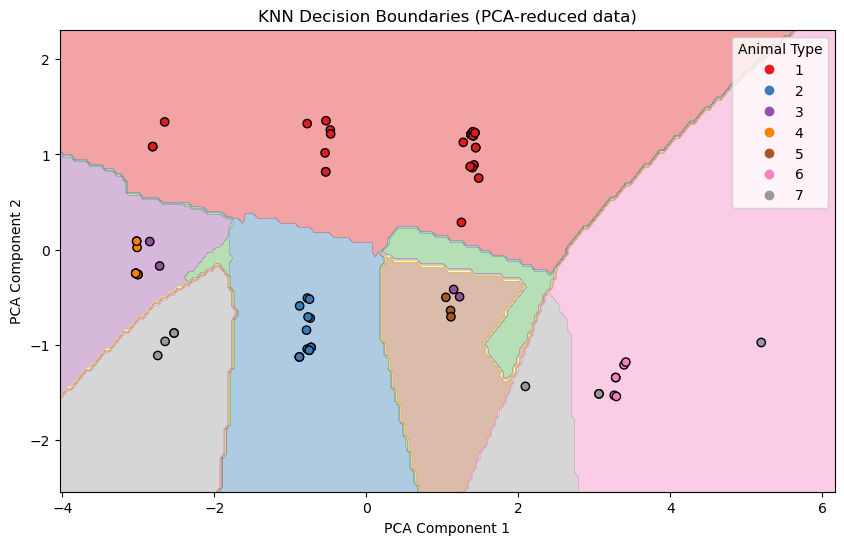

In [158]:
# Plot decision boundaries
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Set1')
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='Set1', edgecolor='k')
plt.title("KNN Decision Boundaries (PCA-reduced data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Animal Type")
plt.show()

## Interview Questions:
1. What are the key hyperparameters in KNN?
- n_neighbors (K) :- The number of nearest neighbors to consider when making a prediction
- weights :- Determines how to weight the neighbors’ votes
- metric :- The distance function used to calculate similarity between points

2. What distance metrics can be used in KNN?
- Euclidean Distance, Manhattan Distance , Minkowski Distance, Chebyshev Distance, Cosine Similarity